### H0 2:
There is no relationship between annual salaries offered and country of origin in the technology industry for computer programming roles. 

### HA 2:
There is a relationship between annual salaries offered to candidates and their country of origin in the technology industry for computer programming roles. 

### METHODOLOGY
I will run an ANOVA test to determine if salaries for computer programming jobs are impacted by the birth country of the candidate and the level of the roles. The candidates are from 200 countries and there are 4 levels of roles.

-Remove the NaNs

-Remove hourly, weekly, bi-weely wages.

-Turn salary into float and remove commas.

-Ran ANOVA for 1 role in 1 industry to test - no significance.

-Grouped together all software developer or computer programming roles.

-Grouped together technical industry titles into "Tech" category.

-Ran ANOVA for both certified and uncertified candidates.

-Ran ANOVA for certified candidates only.

-Removed applicants where there were 5 or less from an individual country.

-Created boxplots of categories

-Ran ANOVA again.



alpha = .05

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import datetime as dt
import geopandas
import seaborn as sns

In [4]:
df = pd.read_csv('visa_clean.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1,2,10,11,12,13,17,18,21,22,23,24,25,26,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head(2)

,Unnamed: 0,application_type,case_received_date,case_status,class_of_admission,decision_date,employer_city,employer_name,employer_num_employees,employer_state,...,foreign_worker_birth_country,foreign_worker_edu_other,foreign_worker_rel_occ_exp,foreign_worker_req_exp,naics_num,naics_title,wage_offer_from,wage_offer_to,wage_unit_of_pay_offer,pw_job_title
0,0,PERM,NaN,Certified,J-1,2012-02-01,NEW YORK,NETSOFT USA INC.,NaN,NY,...,NaN,NaN,NaN,NaN,541512,COMPUTER SYSTEMS DESIGN SERVICES,75629,NaN,Year,"COMPUTER SOFTWARE ENGINEERS, APPLICATIONS"
1,1,PERM,NaN,Denied,B-2,2011-12-21,CARLSTADT,PINNACLE ENVIRONEMNTAL CORP,NaN,NY,...,NaN,NaN,NaN,NaN,562211,HAZARDOUS WASTE TREATMENT AND DISPOSAL,37024,NaN,Year,ASBESTOS HANDLER


In [6]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374362 entries, 0 to 374361
Data columns (total 31 columns):
application_type                 135269 non-null object
case_received_date               239091 non-null object
case_status                      374362 non-null object
class_of_admission               351517 non-null object
decision_date                    374362 non-null object
employer_city                    374348 non-null object
employer_name                    374350 non-null object
employer_num_employees           239013 non-null float64
employer_state                   374320 non-null object
foreign_worker_info_city         239065 non-null object
foreign_worker_info_education    239053 non-null object
foreign_worker_info_state        221898 non-null object
pw_amount_9089                   372146 non-null object
pw_level_9089                    346735 non-null object
pw_soc_code                      373965 non-null object
pw_soc_title                     372026 non-null

In [8]:
df = df[['pw_level_9089','foreign_worker_birth_country','pw_amount_9089','wage_unit_of_pay_offer','case_status','naics_title', 'pw_soc_title','decision_date']]

In [9]:
df['wage_unit_of_pay_offer'].value_counts()

Year         319274
Hour           9470
Week            230
Month           141
Bi-Weekly        30
Name: wage_unit_of_pay_offer, dtype: int64

In [10]:
df = df.loc[df['wage_unit_of_pay_offer']=='Year']
df.shape

(319274, 8)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319274 entries, 0 to 374361
Data columns (total 8 columns):
pw_level_9089                   297604 non-null object
foreign_worker_birth_country    230577 non-null object
pw_amount_9089                  319140 non-null object
wage_unit_of_pay_offer          319274 non-null object
case_status                     319274 non-null object
naics_title                     318274 non-null object
pw_soc_title                    319096 non-null object
decision_date                   319274 non-null object
dtypes: object(8)
memory usage: 21.9+ MB


In [12]:
df.dropna(axis=0, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215044 entries, 135269 to 374361
Data columns (total 8 columns):
pw_level_9089                   215044 non-null object
foreign_worker_birth_country    215044 non-null object
pw_amount_9089                  215044 non-null object
wage_unit_of_pay_offer          215044 non-null object
case_status                     215044 non-null object
naics_title                     215044 non-null object
pw_soc_title                    215044 non-null object
decision_date                   215044 non-null object
dtypes: object(8)
memory usage: 14.8+ MB


In [14]:
df.reset_index(inplace=True)


In [15]:
df.drop(columns=['index'], inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215044 entries, 0 to 215043
Data columns (total 8 columns):
pw_level_9089                   215044 non-null object
foreign_worker_birth_country    215044 non-null object
pw_amount_9089                  215044 non-null object
wage_unit_of_pay_offer          215044 non-null object
case_status                     215044 non-null object
naics_title                     215044 non-null object
pw_soc_title                    215044 non-null object
decision_date                   215044 non-null object
dtypes: object(8)
memory usage: 13.1+ MB


In [17]:
df.foreign_worker_birth_country.unique()

array(['INDIA', 'SOUTH KOREA', 'GERMANY', 'CANADA', 'BRAZIL', 'CHINA',
       'UKRAINE', 'PAKISTAN', 'GUATEMALA', 'ARGENTINA', 'COLOMBIA',
       'FRANCE', 'JAPAN', 'RUSSIA', 'MEXICO', 'PHILIPPINES', 'ISRAEL',
       'NEPAL', 'PERU', 'SOUTH AFRICA', 'UNITED KINGDOM', 'TANZANIA',
       'GRENADA', 'ECUADOR', 'TURKEY', 'PANAMA', 'UZBEKISTAN', 'DOMINICA',
       'NEW ZEALAND', 'HONDURAS', 'NIGERIA', 'UNITED ARAB EMIRATES',
       'BOLIVIA', 'EGYPT', 'AUSTRALIA', 'ZIMBABWE', 'SLOVAKIA',
       'EL SALVADOR', 'MOROCCO', 'LEBANON', 'IRAN', 'TRINIDAD AND TOBAGO',
       'KENYA', 'JAMAICA', 'GUYANA', 'INDONESIA', 'HONG KONG',
       'YUGOSLAVIA', 'POLAND', 'MALAYSIA', 'BANGLADESH', 'VENEZUELA',
       'BULGARIA', 'BELGIUM', 'SPAIN', 'UNITED STATES OF AMERICA',
       'SUDAN', 'ITALY', 'ROMANIA', 'SAUDI ARABIA', 'TOGO', 'PARAGUAY',
       'TAIWAN', 'CHILE', 'IRELAND', 'PORTUGAL', 'ST LUCIA', 'VIETNAM',
       'THAILAND', 'OMAN', 'BELIZE', 'CROATIA', 'IRAQ', 'BHUTAN',
       'BURMA (MYANMAR)', '

In [18]:
df.foreign_worker_birth_country.nunique()

200

In [19]:
df['pw_amount_9089'].unique()

array(['83,366.00', '16,973.00', '49,982.00', ..., '44,237.00',
       '107,994.00', '83,540.00'], dtype=object)

In [20]:
def currency_format(x):
    new_x = x.replace(",","")
    return float(new_x)
    

In [21]:
df['pw_amount_9089'] = df['pw_amount_9089'].astype(str).apply(currency_format)

In [22]:
df.rename(index=str, columns={"pw_amount_9089": "salary", "pw_soc_title": "job", "naics_title":"industry","pw_level_9089":"level"}, inplace=True)

In [23]:
df['decision_date'] = pd.to_datetime(df['decision_date'])

In [24]:
df.case_status.unique()

array(['Certified', 'Denied', 'Certified-Expired', 'Withdrawn'],
      dtype=object)

In [25]:
df.case_status = df.case_status.replace({'Certified': 1, 'Certified-Expired': 1, 'Withdrawn': 0,'Denied': 0})

In [26]:
list(df.job.unique())

['INDUSTRIAL ENGINEERS',
 'MEAT, POULTRY, AND FISH CUTTERS AND TRIMMERS',
 'BIOLOGICAL SCIENTISTS, ALL OTHER',
 'MARKET RESEARCH ANALYSTS AND MARKETING SPECIALISTS*',
 'COOKS, RESTAURANT',
 'PUBLIC RELATIONS SPECIALISTS',
 'COMPUTER SYSTEMS ANALYSTS',
 'COMPUTER PROGRAMMERS',
 'JANITORS AND CLEANERS, EXCEPT MAIDS AND HOUSEKEEPING CLEANERS',
 'SOFTWARE DEVELOPERS, APPLICATIONS',
 'FINANCIAL ANALYSTS',
 'SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE',
 'FARMERS, RANCHERS, AND OTHER AGRICULTURAL MANAGERS',
 'HEALTH SPECIALTIES TEACHERS, POSTSECONDARY',
 'OPERATIONS RESEARCH ANALYSTS',
 'DATABASE ADMINISTRATORS',
 'INDUSTRIAL PRODUCTION MANAGERS',
 'ELECTRICAL AND ELECTRONICS ENGINEERING TECHNICIANS',
 'SALES ENGINEERS',
 'ELECTRONICS ENGINEERS, EXCEPT COMPUTER',
 'BUSINESS TEACHERS, POSTSECONDARY',
 'TILE AND MARBLE SETTERS',
 'MATERIALS ENGINEERS',
 'ACCOUNTANTS AND AUDITORS',
 'COST ESTIMATORS',
 'INTERNISTS, GENERAL',
 'FASHION DESIGNERS',
 'SALES MANAGERS',
 'SOFTWARE DEVELOPERS, APPLICATIONS

In [27]:
df1 = df[df['job'].str.contains('COMPU|DEV')]


In [28]:
list(df1.job.unique())


['COMPUTER SYSTEMS ANALYSTS',
 'COMPUTER PROGRAMMERS',
 'SOFTWARE DEVELOPERS, APPLICATIONS',
 'SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE',
 'ELECTRONICS ENGINEERS, EXCEPT COMPUTER',
 'SOFTWARE DEVELOPERS, APPLICATIONS, NON R & D (ACWIA ONLY)',
 'COMPUTER AND INFORMATION SYSTEMS MANAGERS',
 'COMPUTER SOFTWARE ENGINEERS, APPLICATIONS',
 'NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS*',
 'COMPUTER SOFTWARE ENGINEERS, SYSTEMS SOFTWARE',
 'COMPUTER SUPPORT SPECIALISTS',
 'COMPUTER SOFTWARE ENGINEERS, SYSTEMS SOFTWARE,R&D',
 'NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS',
 'INFORMATION SECURITY ANALYSTS, WEB DEVELOPERS, AND COMPUTER NETWORK ARCHITECTS',
 'COMPUTER HARDWARE ENGINEERS',
 'TRAINING AND DEVELOPMENT MANAGERS',
 'TRAINING AND DEVELOPMENT SPECIALISTS',
 'COMPUTER OCCUPATIONS, ALL OTHER*',
 'COMPUTER AND INFORMATION RESEARCH SCIENTISTS',
 'COMPUTER OPERATORS',
 'COMPUTER SCIENCE TEACHERS, POSTSECONDARY',
 'COMPUTER SYSTEMS ANALYSTS, NON R&D (ACWIA ONLY)',
 'COMPUTER-CONTROLLED MACHINE TOOL

In [29]:
df2 = df.loc[df['job']=='COMPUTER SOFTWARE ENGINEERS, APPLICATIONS']

In [30]:
df2.industry.value_counts()

CUSTOM COMPUTER PROGRAMMING SERVICES                                        59
COMPUTER SYSTEMS DESIGN AND RELATED SERVICES                                10
COMPUTER SYSTEMS DESIGN SERVICES                                             7
COMMERCIAL BANKING                                                           5
OTHER COMPUTER RELATED SERVICES                                              4
SOFTWARE PUBLISHERS                                                          4
FINANCIAL TRANSACTIONS PROCESSING, RESERVE, AND CLEARINGHOUSE ACTIVITIES     2
PAINT AND COATING MANUFACTURING                                              2
RESEARCH AND DEVELOPMENT IN THE PHYSICAL, ENGINEERING, AND LIFE SCIENCES     1
VIDEO TAPE AND DISC RENTAL                                                   1
ALL OTHER INFORMATION SERVICES                                               1
HOME HEALTH CARE SERVICES                                                    1
INTERIOR DESIGN SERVICES                            

In [31]:
df3 = df2.loc[df2['industry']== 'CUSTOM COMPUTER PROGRAMMING SERVICES']
df3.head()

,level,foreign_worker_birth_country,salary,wage_unit_of_pay_offer,case_status,industry,job,decision_date
188,Level III,INDIA,96013.0,Year,1,CUSTOM COMPUTER PROGRAMMING SERVICES,"COMPUTER SOFTWARE ENGINEERS, APPLICATIONS",2014-11-17
194,Level II,INDIA,77834.0,Year,0,CUSTOM COMPUTER PROGRAMMING SERVICES,"COMPUTER SOFTWARE ENGINEERS, APPLICATIONS",2015-06-22
205,Level I,INDIA,60382.0,Year,0,CUSTOM COMPUTER PROGRAMMING SERVICES,"COMPUTER SOFTWARE ENGINEERS, APPLICATIONS",2014-10-14
206,Level I,INDIA,60778.0,Year,0,CUSTOM COMPUTER PROGRAMMING SERVICES,"COMPUTER SOFTWARE ENGINEERS, APPLICATIONS",2015-05-19
230,Level I,INDIA,63814.4,Year,0,CUSTOM COMPUTER PROGRAMMING SERVICES,"COMPUTER SOFTWARE ENGINEERS, APPLICATIONS",2015-05-20


In [32]:
formula = 'salary ~ C(foreign_worker_birth_country)'
lm = ols(formula,df3).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)


                                       sum_sq    df         F    PR(>F)
C(foreign_worker_birth_country)  2.900416e+08   2.0  0.766975  0.469232
Residual                         1.058856e+10  56.0       NaN       NaN


In [33]:
techdf = df1[df1['job'].isin(['COMPUTER PROGRAMMERS',
 'SOFTWARE DEVELOPERS, APPLICATIONS',
 'SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE',
 'SOFTWARE DEVELOPERS, APPLICATIONS, NON R & D (ACWIA ONLY)',
 'COMPUTER SOFTWARE ENGINEERS, APPLICATIONS',
 'COMPUTER SOFTWARE ENGINEERS, SYSTEMS SOFTWARE',
 'COMPUTER SOFTWARE ENGINEERS, SYSTEMS SOFTWARE,R&D',
 'SOFTWARE DEVELOPERS, APPLICATIONS, R&D (ACWIA ONLY)',
 'WEB DEVELOPERS',
 'SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE, NON R&D (ACWIA ONLY)',
 'COMPUTER PROGRAMMERS NON R & D (ACWIA ONLY)',
 'SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE, R&D (ACWIA ONLY)',
 'COMPUTER SOFTWARE ENGINEERS, SYSTEMS SOFTWARE, NON R&D'])]

In [34]:
list(techdf.industry.unique())

['CUSTOM COMPUTER PROGRAMMING SERVICES',
 'COMPUTER SYSTEMS DESIGN SERVICES',
 'OTHER COMPUTER PERIPHERAL EQUIPMENT MANUFACTURING',
 'OTHER COMPUTER RELATED SERVICES',
 'RADIO AND TELEVISION BROADCASTING AND WIRELESS COMMUNICATIONS EQUIPMENT MANUFACTURING',
 'COMPUTER SYSTEMS DESIGN AND RELATED SERVICES',
 'WEB SEARCH PORTALS',
 'CABLE AND OTHER SUBSCRIPTION PROGRAMMING',
 'SOFTWARE PUBLISHERS',
 'FINANCIAL TRANSACTIONS PROCESSING, RESERVE, AND CLEARINGHOUSE ACTIVITIES',
 'INVESTMENT BANKING AND SECURITIES DEALING',
 'COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS',
 'DEPARTMENT STORES',
 'COSMETICS, BEAUTY SUPPLIES, AND PERFUME STORES',
 'CREDIT CARD ISSUING',
 'MISCELLANEOUS FINANCIAL INVESTMENT ACTIVITIES',
 'PAINT AND COATING MANUFACTURING',
 'RESEARCH AND DEVELOPMENT IN THE PHYSICAL, ENGINEERING, AND LIFE SCIENCES',
 'WIRELESS TELECOMMUNICATIONS CARRIERS (EXCEPT SATELLITE)',
 'ELECTRONIC COMPUTER MANUFACTURING',
 'SEMICONDUCTOR AND RELATED DEVICE MANUFACTURING',
 'WOOD WINDOW AN

In [35]:
tech_df = techdf[techdf['industry'].isin(['COMPUTER SYSTEMS DESIGN SERVICES',
 'CUSTOM COMPUTER PROGRAMMING SERVICES',
 'OTHER COMPUTER PERIPHERAL EQUIPMENT MANUFACTURING',
 'COMPUTER SYSTEMS DESIGN AND RELATED SERVICES',
 'OTHER COMPUTER RELATED SERVICES',
 'WEB SEARCH PORTALS',
 'SOFTWARE PUBLISHERS',
 'FINANCIAL TRANSACTIONS PROCESSING, RESERVE, AND CLEARINGHOUSE ACTIVITIES',
 'COMPUTER AND COMPUTER PERIPHERAL EQUIPMENT AND SOFTWARE MERCHANT WHOLESALERS', 'INTERNET PUBLISHING AND BROADCASTING',
 'SECURITY SYSTEMS SERVICES', 'ENGINEERING SERVICES', 'INTERNET SERVICE PROVIDERS AND WEB SEARCH PORTALS','DATA PROCESSING, HOSTING, AND RELATED SERVICES'])]


In [36]:
tech_df.shape

(63694, 8)

In [37]:
low_app = tech_df.groupby(['foreign_worker_birth_country'])['level'].count()<5


In [38]:
low_app = low_app.to_frame()
low_app = low_app.reset_index()
exclude = low_app[low_app.level == True]

In [39]:
exclude_me = list(exclude['foreign_worker_birth_country'])

In [40]:
exclude_me

['AFGHANISTAN',
 'ANDORRA',
 'ANTIGUA AND BARBUDA',
 'BARBADOS',
 'BELIZE',
 'BENIN',
 'BERMUDA',
 'BOLIVIA',
 'BOTSWANA',
 'BRITISH VIRGIN ISLANDS',
 'BURKINA FASO',
 'CUBA',
 'CYPRUS',
 'CZECHOSLOVAKIA',
 'DOMINICA',
 'ERITREA',
 'FIJI',
 'GABON',
 'GUYANA',
 'HAITI',
 'HONDURAS',
 'IVORY COAST',
 'KOSOVO',
 'LESOTHO',
 'LUXEMBOURG',
 'MADAGASCAR',
 'MALAWI',
 'MALTA',
 'MAURITANIA',
 'MAURITIUS',
 'MONTENEGRO',
 'NAMIBIA',
 'NICARAGUA',
 'PANAMA',
 'PARAGUAY',
 'RWANDA',
 'SENEGAL',
 'SERBIA AND MONTENEGRO',
 'SEYCHELLES',
 'SLOVENIA',
 'ST LUCIA',
 'SUDAN',
 'SWAZILAND',
 'TAJIKISTAN',
 'TRINIDAD AND TOBAGO',
 'TURKMENISTAN',
 'UGANDA',
 'YEMEN',
 'YUGOSLAVIA',
 'ZAMBIA']

In [41]:
clean_df = tech_df[~tech_df['foreign_worker_birth_country'].isin(exclude_me)]

In [42]:
clean_df

,level,foreign_worker_birth_country,salary,wage_unit_of_pay_offer,case_status,industry,job,decision_date
11,Level I,INDIA,46301.0,Year,1,CUSTOM COMPUTER PROGRAMMING SERVICES,COMPUTER PROGRAMMERS,2015-06-12
16,Level II,UKRAINE,98675.0,Year,1,CUSTOM COMPUTER PROGRAMMING SERVICES,"SOFTWARE DEVELOPERS, APPLICATIONS",2015-05-13
17,Level III,INDIA,99424.0,Year,1,COMPUTER SYSTEMS DESIGN SERVICES,"SOFTWARE DEVELOPERS, APPLICATIONS",2015-05-20
18,Level II,CHINA,98675.0,Year,1,OTHER COMPUTER PERIPHERAL EQUIPMENT MANUFACTURING,"SOFTWARE DEVELOPERS, APPLICATIONS",2015-09-11
23,Level IV,PAKISTAN,104790.0,Year,1,OTHER COMPUTER RELATED SERVICES,"SOFTWARE DEVELOPERS, APPLICATIONS",2015-06-11
28,Level II,INDIA,54059.0,Year,1,COMPUTER SYSTEMS DESIGN SERVICES,"SOFTWARE DEVELOPERS, APPLICATIONS",2015-04-01
29,Level III,INDIA,90813.0,Year,1,CUSTOM COMPUTER PROGRAMMING SERVICES,"SOFTWARE DEVELOPERS, APPLICATIONS",2015-09-01
42,Level III,INDIA,90459.0,Year,1,CUSTOM COMPUTER PROGRAMMING SERVICES,"SOFTWARE DEVELOPERS, APPLICATIONS",2015-05-28
45,Level II,CHINA,74651.0,Year,1,COMPUTER SYSTEMS DESIGN AND RELATED SERVICES,"SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE",2015-06-08
46,Level II,JAPAN,98675.0,Year,1,WEB SEARCH PORTALS,"SOFTWARE DEVELOPERS, APPLICATIONS",2015-05-13


In [43]:
clean_df.case_status.unique()

array([1, 0])

In [44]:
g_df = tech_df[['salary','foreign_worker_birth_country','level']]

In [45]:
formula1 = 'salary ~ C(foreign_worker_birth_country)* C(level)'
lm = ols(formula1,tech_df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                                                sum_sq       df          F  \
C(foreign_worker_birth_country)           1.099026e+12    156.0  25.033068   
C(level)                                  2.148486e+04      3.0   0.000025   
C(foreign_worker_birth_country):C(level)  1.182262e+13    468.0  89.763196   
Residual                                  1.779169e+13  63219.0        NaN   

                                                 PR(>F)  
C(foreign_worker_birth_country)           1.162580e-257  
C(level)                                   9.959751e-01  
C(foreign_worker_birth_country):C(level)   0.000000e+00  
Residual                                            NaN  


/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 156, but rank is 57
  'rank is %d' % (J, J_), ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 468, but rank is 350
  'rank is %d' % (J, J_), ValueWarning)


In [46]:
formula1 = 'salary ~ C(foreign_worker_birth_country)* C(level)'
lm = ols(formula1,clean_df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                                                sum_sq       df            F  \
C(foreign_worker_birth_country)           2.417237e+12    106.0    81.028221   
C(level)                                  4.920948e+12      3.0  5828.414992   
C(foreign_worker_birth_country):C(level)  2.282324e+11    318.0     2.550193   
Residual                                  1.778806e+13  63205.0          NaN   

                                                PR(>F)  
C(foreign_worker_birth_country)           0.000000e+00  
C(level)                                  0.000000e+00  
C(foreign_worker_birth_country):C(level)  1.017885e-40  
Residual                                           NaN  


/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 106, but rank is 79
  'rank is %d' % (J, J_), ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  'rank is %d' % (J, J_), ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 318, but rank is 290
  'rank is %d' % (J, J_), ValueWarning)


In [76]:
clean_df['foreign_worker_birth_country'].nunique()

107

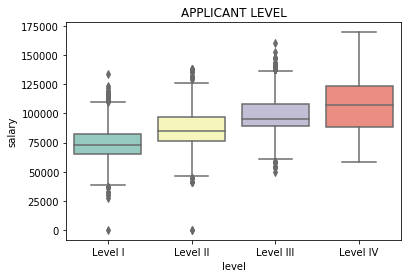

In [69]:
ax = sns.boxplot(x="level", y="salary", data=clean_df, palette="Set3").set_title('APPLICANT LEVEL')

Text(0.5, 1.0, 'APPLICANT BIRTH COUNTRIES')

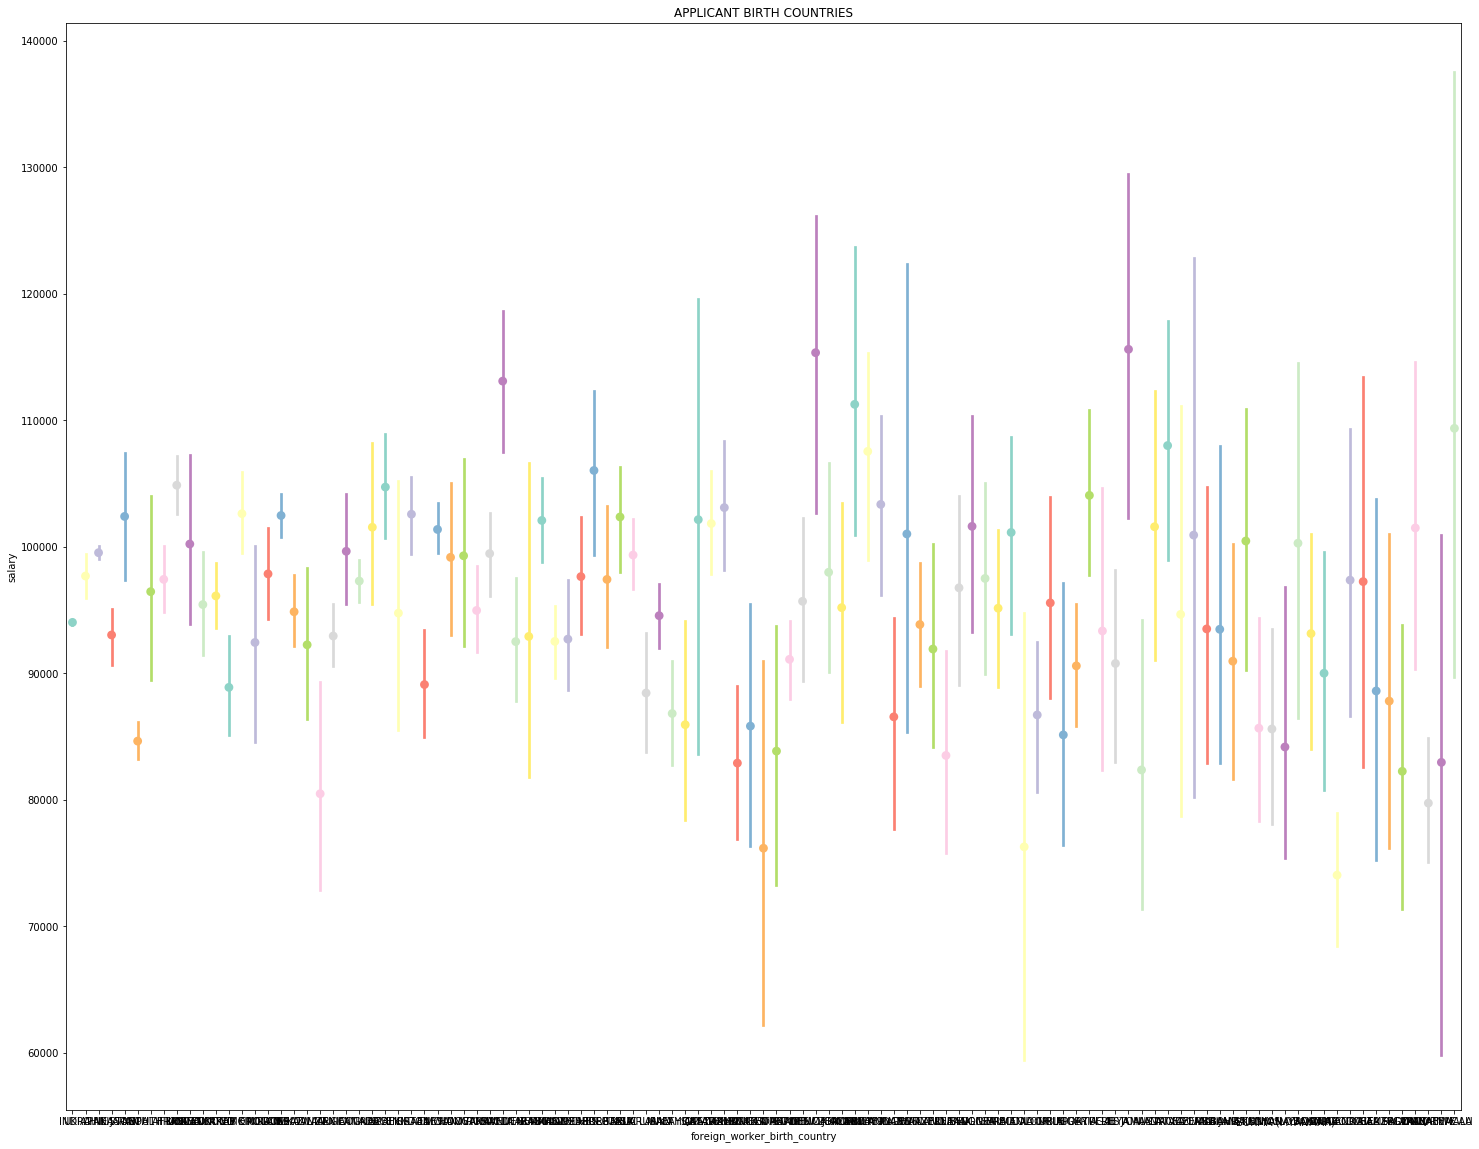

In [70]:

plt.figure(figsize=(25,20))
sns.pointplot(x="foreign_worker_birth_country", y="salary",data=clean_df, palette="Set3").set_title('APPLICANT BIRTH COUNTRIES')

In [50]:
tech_df2 = tech_df[tech_df['case_status']==1]

In [51]:
tech_df2.head()

,level,foreign_worker_birth_country,salary,wage_unit_of_pay_offer,case_status,industry,job,decision_date
11,Level I,INDIA,46301.0,Year,1,CUSTOM COMPUTER PROGRAMMING SERVICES,COMPUTER PROGRAMMERS,2015-06-12
16,Level II,UKRAINE,98675.0,Year,1,CUSTOM COMPUTER PROGRAMMING SERVICES,"SOFTWARE DEVELOPERS, APPLICATIONS",2015-05-13
17,Level III,INDIA,99424.0,Year,1,COMPUTER SYSTEMS DESIGN SERVICES,"SOFTWARE DEVELOPERS, APPLICATIONS",2015-05-20
18,Level II,CHINA,98675.0,Year,1,OTHER COMPUTER PERIPHERAL EQUIPMENT MANUFACTURING,"SOFTWARE DEVELOPERS, APPLICATIONS",2015-09-11
23,Level IV,PAKISTAN,104790.0,Year,1,OTHER COMPUTER RELATED SERVICES,"SOFTWARE DEVELOPERS, APPLICATIONS",2015-06-11


In [52]:
tech_df2.case_status.nunique()

1

In [53]:
formula1 = 'salary ~ C(foreign_worker_birth_country)* C(level)'
lm = ols(formula1,tech_df2).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                                                sum_sq       df          F  \
C(foreign_worker_birth_country)           1.070240e+12    156.0  24.043522   
C(level)                                 -2.414211e+04      3.0  -0.000028   
C(foreign_worker_birth_country):C(level)  1.088357e+13    468.0  81.501768   
Residual                                  1.694161e+13  59374.0        NaN   

                                                 PR(>F)  
C(foreign_worker_birth_country)           9.425058e-242  
C(level)                                   1.000000e+00  
C(foreign_worker_birth_country):C(level)   0.000000e+00  
Residual                                            NaN  


/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 156, but rank is 56
  'rank is %d' % (J, J_), ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 468, but rank is 348
  'rank is %d' % (J, J_), ValueWarning)


In [54]:
tech_df.groupby(['level','job','foreign_worker_birth_country']).count()

salary  \
level    job                                           foreign_worker_birth_country           
Level I  COMPUTER PROGRAMMERS                          BANGLADESH                         1   
                                                       BRAZIL                             2   
                                                       CAMEROON                           1   
                                                       CHINA                              2   
                                                       INDIA                             37   
                                                       JAPAN                              1   
                                                       NEPAL                              3   
                                                       NIGERIA                            1   
                                                       PAKISTAN                           8   
                                                       PHILIPPINES                        1   
                                                       SRI LANKA                          1   
                                                       UKRAINE                            2   
         COMPUTER PROGRAMMERS NON R & D (ACWIA ONLY)   BULGARIA                           1   
         COMPUTER SOFTWARE ENGINEERS, APPLICATIONS     CANADA                             1   
                                                       INDIA                             25   
                                                       NETHERLANDS                        1   
         COMPUTER SOFTWARE ENGINEERS, SYSTEMS SOFTWARE INDIA                              4   
                                                       NEW ZEALAND                        1   
         SOFTWARE DEVELOPERS, APPLICATIONS             AFGHANISTAN                        1   
                                                       ALBANIA                            2   
                                                       ALGERIA                            1   
                                                       ARGENTINA                         18   
                                                       ARMENIA                            4   
                                                       AUSTRALIA                         23   
                                                       AUSTRIA                            2   
                                                       AZERBAIJAN                         3   
                                                       BAHRAIN                            3   
                                                       BANGLADESH                        24   
                                                       BELARUS                           16   
                                                       BELGIUM                            3   
...                                                                                     ...   
Level IV SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE         ROMANIA                            4   
                                                       RUSSIA                            34   
                                                       SAUDI ARABIA                       5   
                                                       SENEGAL                            1   
                                                       SINGAPORE                          2   
                                                       SLOVAKIA                           1   
                                                       SLOVENIA                           1   
                                                       SOUTH AFRICA                       4   
                                                       SOUTH KOREA                       10   
                                                       SPAIN                             11   


In [55]:
tech_df2.groupby(['level','job','foreign_worker_birth_country']).mean()

salary  \
level    job                                           foreign_worker_birth_country                  
Level I  COMPUTER PROGRAMMERS                          BANGLADESH                     52874.000000   
                                                       BRAZIL                         48568.000000   
                                                       CAMEROON                       65957.000000   
                                                       CHINA                          55359.500000   
                                                       INDIA                          55912.200000   
                                                       JAPAN                          63856.000000   
                                                       NEPAL                          49108.500000   
                                                       NIGERIA                        79498.000000   
                                                       PAKISTAN                       59939.714286   
                                                       PHILIPPINES                    81765.000000   
                                                       SRI LANKA                      60549.000000   
                                                       UKRAINE                        63013.500000   
         COMPUTER PROGRAMMERS NON R & D (ACWIA ONLY)   BULGARIA                       72010.000000   
         COMPUTER SOFTWARE ENGINEERS, APPLICATIONS     INDIA                          59034.480000   
         COMPUTER SOFTWARE ENGINEERS, SYSTEMS SOFTWARE INDIA                          65291.000000   
         SOFTWARE DEVELOPERS, APPLICATIONS             AFGHANISTAN                    73923.000000   
                                                       ALBANIA                        87797.000000   
                                                       ALGERIA                        76690.000000   
                                                       ARGENTINA                      82897.000000   
                                                       ARMENIA                        72269.250000   
                                                       AUSTRALIA                      81655.000000   
                                                       AUSTRIA                        69545.000000   
                                                       AZERBAIJAN                     81744.000000   
                                                       BAHRAIN                        71157.000000   
                                                       BANGLADESH                     79284.476190   
                                                       BELARUS                        76460.687500   
                                                       BELGIUM                        84739.000000   
                                                       BOLIVIA                        66414.000000   
                                                       BOSNIA AND HERZEGOVINA         73861.000000   
                                                       BOTSWANA                       67538.000000   
...                                                                                            ...   
Level IV SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE         POLAND                        131574.714286   
                                                       PORTUGAL                      132132.000000   
                                                       ROMANIA                       125933.500000   
                                                       RUSSIA                        131322.285714   
                                                       SAUDI ARABIA                  119400.400000   
                                                       SENEGAL                       133328.000000   
                                                       SINGAPORE                     124165.500000   
            

In [56]:
list(tech_df2.level.unique())

['Level I', 'Level II', 'Level III', 'Level IV']

In [57]:
lev1_tech = tech_df2[tech_df2['level']== 'Level I']

In [58]:
lev2_tech = tech_df2[tech_df2['level']== 'Level II']

In [59]:
lev3_tech = tech_df2[tech_df2['level']== 'Level III']

In [60]:
lev4_tech = tech_df2[tech_df2['level']== 'Level IV']

In [61]:
lev1_tech.groupby('foreign_worker_birth_country').mean().sort_values(by='salary')

,salary,case_status
foreign_worker_birth_country,,
CROATIA,56181.000000,1
TRINIDAD AND TOBAGO,56326.000000,1
ECUADOR,56389.000000,1
DENMARK,57512.000000,1
DOMINICA,57907.000000,1
MADAGASCAR,59696.000000,1
UZBEKISTAN,60666.666667,1
MACEDONIA,61360.000000,1
BRITISH VIRGIN ISLANDS,63398.000000,1


In [62]:
lev2_tech.groupby('foreign_worker_birth_country').mean().sort_values(by='salary')[0:6]

,salary,case_status
foreign_worker_birth_country,,
ICELAND,48880.000000,1
GUYANA,54059.000000,1
NICARAGUA,61734.000000,1
ECUADOR,71448.000000,1
CAMBODIA,73580.000000,1
URUGUAY,74172.666667,1


In [63]:
lev3_tech.groupby('foreign_worker_birth_country').mean().sort_values(by='salary')[0:6]

,salary,case_status
foreign_worker_birth_country,,
EL SALVADOR,66851.0,1
SEYCHELLES,72550.0,1
KOSOVO,72842.0,1
HONDURAS,75525.0,1
OMAN,76357.0,1
SWITZERLAND,78874.0,1


In [64]:
lev4_tech.groupby('foreign_worker_birth_country').mean().sort_values(by='salary')


,salary,case_status
foreign_worker_birth_country,,
TUNISIA,90438.000000,1
EL SALVADOR,92976.000000,1
PANAMA,96928.000000,1
LIBYA,98954.000000,1
VENEZUELA,100800.166667,1
UNITED ARAB EMIRATES,101003.833333,1
SYRIA,102794.000000,1
MALAYSIA,103350.000000,1
ETHIOPIA,103674.333333,1


In [65]:
clean_df.to_csv(r'plot_data.csv')


In [82]:
low_5 = clean_df.groupby(['foreign_worker_birth_country']).salary.mean().sort_values()[0:5]

In [92]:
high_5 = clean_df.groupby(['foreign_worker_birth_country']).salary.mean().sort_values()[-6:-1]

(0, 120000)

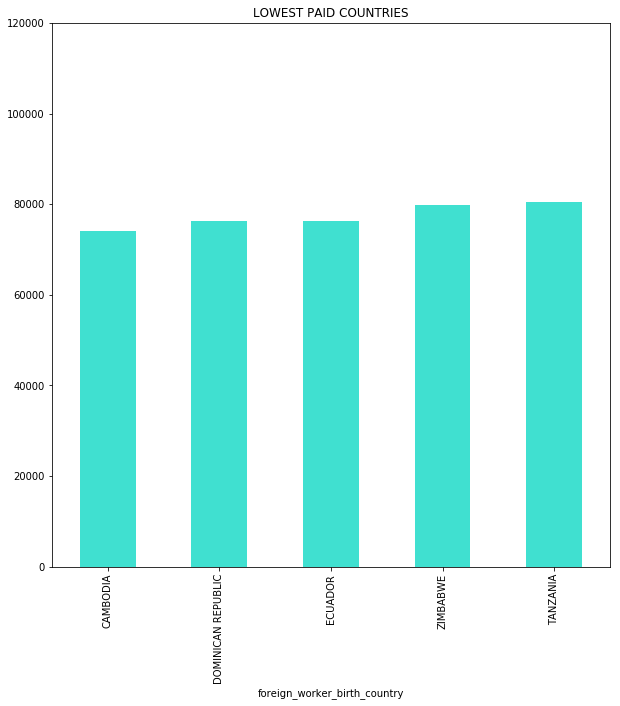

In [121]:
plt.figure(figsize= (10,10))

low_5.plot.bar(color = 'turquoise').set_title('LOWEST PAID COUNTRIES')
plt.gca().set_ylim(0,120000)

Text(0.5, 1.0, 'HIGHEST PAID COUNTRIES')

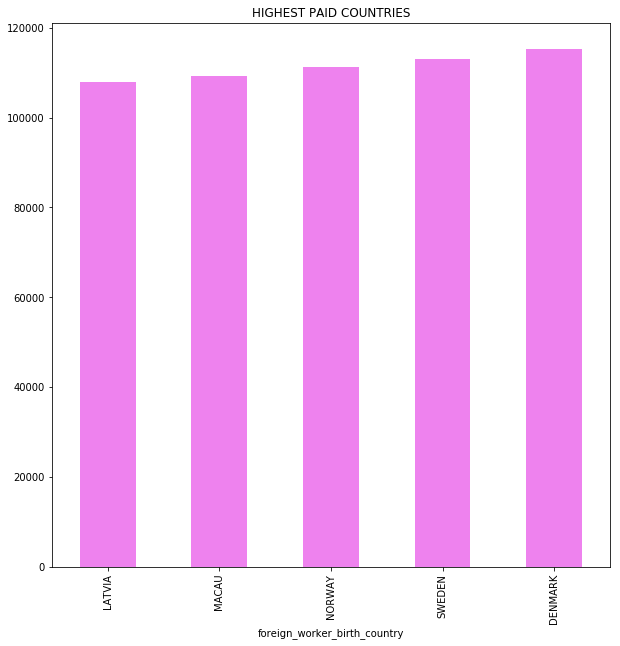

In [120]:
plt.figure(figsize= (10,10))
high_5.plot.bar(color = 'violet').set_title('HIGHEST PAID COUNTRIES')


In [ ]:
x = 
ax = plt.subplot(111)
w = 0.3
ax.bar(x-w, y, width=w, color='b', align='center')
ax.bar(x, z, width=w, color='g', align='center')
ax.autoscale(tight=True)

plt.show()